In [ ]:
 !pip install opencv-python numpy pandas matplotlib pillow


: 

In [7]:
# ensure pandas is installed in this notebook environment
# %pip install matplotlib

# install opencv if missing (use %pip in notebooks)
# When a ModuleNotFoundError occurs for cv2, install opencv using the magic %pip command.
%pip install opencv-python --quiet

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## Image  augmentation

Configuration 

In [8]:
YOUR_NAME = "Kerie"  
# Folder paths (matching YOUR structure)
IMAGE_FOLDER = f"image_data/{YOUR_NAME}"
AUGMENTED_FOLDER = f"augmented_images_{YOUR_NAME}"
OUTPUT_CSV = f"features_image/{YOUR_NAME}_image_features.csv"
print(f"\n Your Configuration:")
print(f"   Student Name: {YOUR_NAME}")
print(f"   Image Folder: {IMAGE_FOLDER}/")
print(f"   Augmented Folder: {AUGMENTED_FOLDER}/")
print(f"   Output CSV: {OUTPUT_CSV}")



 Your Configuration:
   Student Name: Kerie
   Image Folder: image_data/Kerie/
   Augmented Folder: augmented_images_Kerie/
   Output CSV: features_image/Kerie_image_features.csv


In [9]:
import os
print("STEP 1: CHECKING YOUR FILES")

def check_files_exist():
    """Check if folder and images exist"""
    
    print(f"\n Looking for folder: {IMAGE_FOLDER}/")
    
    # Check if folder exists
    if not os.path.exists(IMAGE_FOLDER):
        print(f" ERROR: Folder '{IMAGE_FOLDER}' does not exist!")
        print(f"\nExpected structure:")
        print(f"   image_data/")
        print(f"   └── {YOUR_NAME}/")
        print(f"       ├── neutral.jpg")
        print(f"       ├── smiling.jpg")
        print(f"       └── surprised.jpg")
        return False
    
    print(f" Folder exists!")
    
    # List all files in folder
    print(f"\n Files in {IMAGE_FOLDER}/:")
    all_files = os.listdir(IMAGE_FOLDER)
    
    if len(all_files) == 0:
        print(f"    Folder is empty!")
        return False
    
    for file in all_files:
        print(f"   - {file}")
    
    # Check for image files (any format)
    image_extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']
    image_files = [f for f in all_files if any(f.endswith(ext) for ext in image_extensions)]
    
    print(f"\n Found {len(image_files)} image file(s)")
    
    if len(image_files) < 3:
        print(f"  WARNING: Expected at least 3 images, found {len(image_files)}")
        print(f"   Please make sure you have 3 facial images")
    else:
        print(f" Good! Found {len(image_files)} images")
    
    return len(image_files) > 0

# Run check
files_exist = check_files_exist()

if not files_exist:
    print("\n Please upload your images to the correct folder first!")
    print(f"   Upload to: image_data/{YOUR_NAME}/")
else:
    print("\n Ready to proceed!")

STEP 1: CHECKING YOUR FILES

 Looking for folder: image_data/Kerie/
 Folder exists!

 Files in image_data/Kerie/:
   - Kerie_neutral.jpeg
   - Kerie_smiling.jpeg
   - Kerie_suprised.jpeg

 Found 3 image file(s)
 Good! Found 3 images

 Ready to proceed!


 Load All Images

In [10]:
def load_all_images():
    """Load all image files from folder"""
    
    # Get all image files
    image_extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']
    all_files = os.listdir(IMAGE_FOLDER)
    image_files = [f for f in all_files if any(f.endswith(ext) for ext in image_extensions)]
    
    images = {}
    
    for filename in image_files:
        filepath = os.path.join(IMAGE_FOLDER, filename)
        
        try:
            # Try with OpenCV first
            img = cv2.imread(filepath)
            
            if img is None:
                # If cv2 fails, try with PIL
                print(f"   Trying PIL for {filename}...")
                pil_img = Image.open(filepath)
                img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
            
            images[filename] = img
            print(f" Loaded: {filename} - Shape: {img.shape}")
            
        except Exception as e:
            print(f" Failed to load {filename}: {e}")
            continue
    
    return images

# Load images
images = load_all_images()

if len(images) == 0:
    print("\n No images could be loaded!")
else:
    print(f"\n Successfully loaded {len(images)} image(s)!")


 Loaded: Kerie_neutral.jpeg - Shape: (2560, 1919, 3)
 Loaded: Kerie_smiling.jpeg - Shape: (2560, 1919, 3)
 Loaded: Kerie_suprised.jpeg - Shape: (2560, 1919, 3)

 Successfully loaded 3 image(s)!


Display Your Images

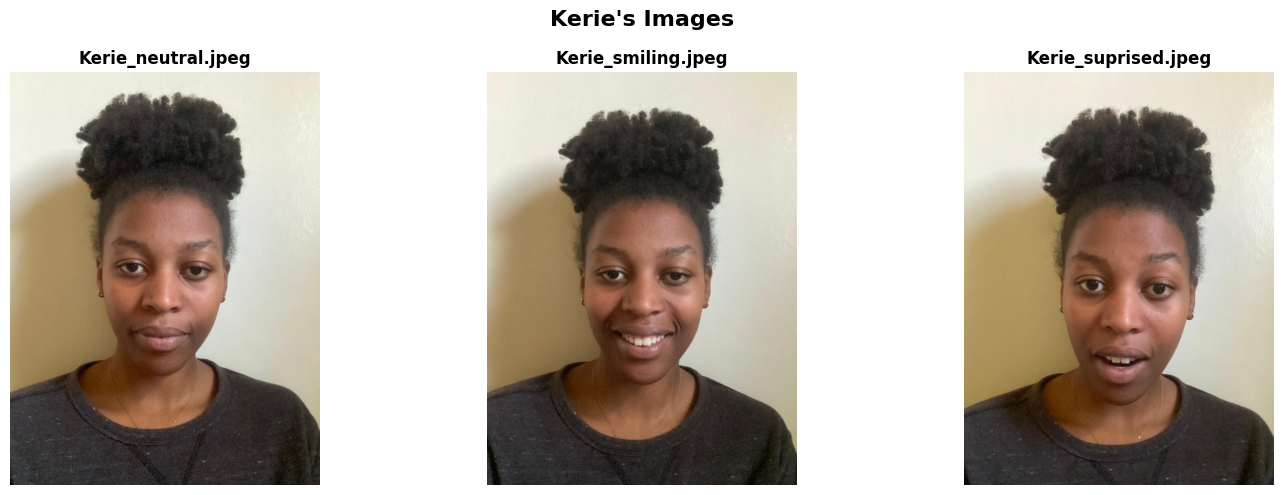


 Images displayed successfully!


In [11]:
if len(images) > 0:
    num_images = len(images)
    cols = min(3, num_images)
    rows = (num_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))
    
    # Handle single image case
    if num_images == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for idx, (filename, img) in enumerate(images.items()):
        # Convert BGR to RGB for correct colors
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        if num_images == 1:
            axes[0].imshow(img_rgb)
            axes[0].set_title(filename, fontsize=12, fontweight='bold')
            axes[0].axis('off')
        else:
            axes[idx].imshow(img_rgb)
            axes[idx].set_title(filename, fontsize=12, fontweight='bold')
            axes[idx].axis('off')
    
    # Hide extra subplots if any
    if num_images > 1:
        for idx in range(num_images, len(axes)):
            axes[idx].axis('off')
    
    plt.suptitle(f"{YOUR_NAME}'s Images", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\n Images displayed successfully!")


 Create Augmented Images

  1. Rotated (15° clockwise)
  2. Flipped (horizontal mirror)
  3. Grayscale (black & white)
  4. Brightness adjusted (+40)
  5. Blurred (Gaussian blur)

 Created/using folder: augmented_images_Kerie/

  Processing: Kerie_neutral.jpeg
     Rotated: Kerie_neutral_rotated.jpg
     Flipped: Kerie_neutral_flipped.jpg
     Grayscale: Kerie_neutral_gray.jpg
     Brightened: Kerie_neutral_bright.jpg
     Blurred: Kerie_neutral_blur.jpg

  Processing: Kerie_smiling.jpeg
     Rotated: Kerie_smiling_rotated.jpg
     Flipped: Kerie_smiling_flipped.jpg
     Grayscale: Kerie_smiling_gray.jpg
     Brightened: Kerie_smiling_bright.jpg
     Brightened: Kerie_neutral_bright.jpg
     Blurred: Kerie_neutral_blur.jpg

  Processing: Kerie_smiling.jpeg
     Rotated: Kerie_smiling_rotated.jpg
     Flipped: Kerie_smiling_flipped.jpg
     Grayscale: Kerie_smiling_gray.jpg
     Brightened: Kerie_smiling_bright.jpg
     Blurred: Kerie_smiling_blur.jpg

  Processing: Kerie_suprised.jpeg
     Rotated: Kerie_supris

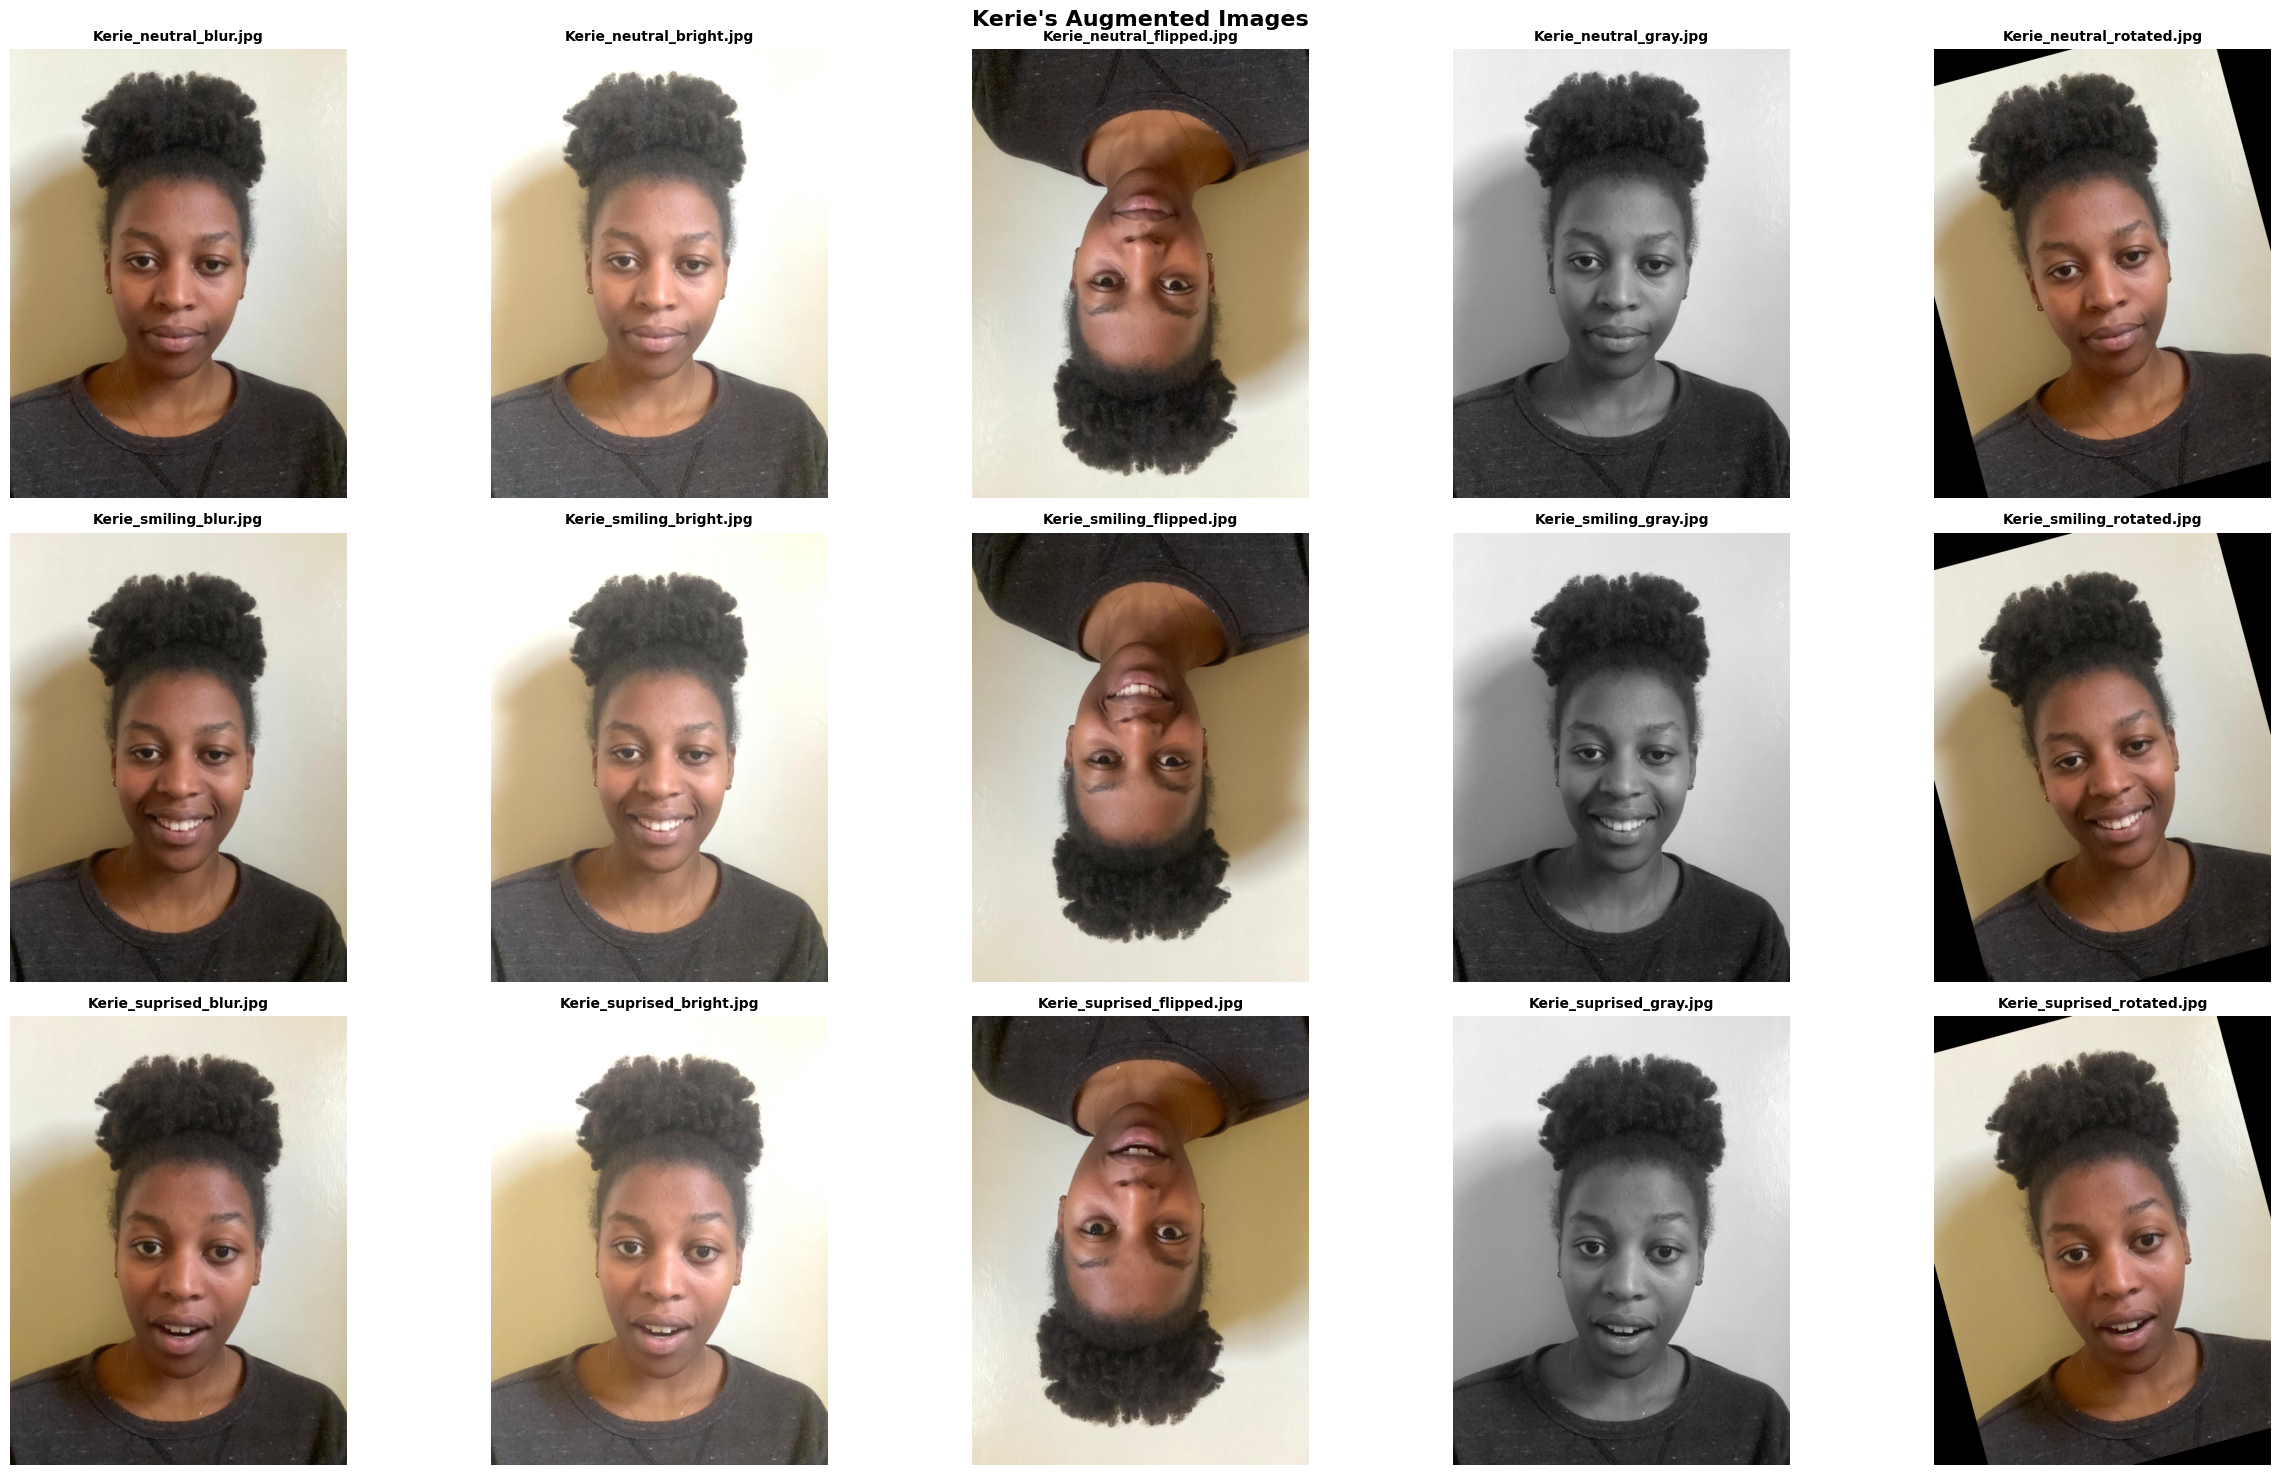


 Augmented images displayed successfully!


In [12]:
print(f"  1. Rotated (15° clockwise)")
print(f"  2. Flipped (horizontal mirror)")
print(f"  3. Grayscale (black & white)")
print(f"  4. Brightness adjusted (+40)")
print(f"  5. Blurred (Gaussian blur)")


def create_augmentations():
    """Create augmented versions including rotation, flip, grayscale, brightness, blur."""
    
    Path(AUGMENTED_FOLDER).mkdir(parents=True, exist_ok=True)
    print(f"\n Created/using folder: {AUGMENTED_FOLDER}/")
    
    augmented_count = 0
    
    for filename, img in images.items():
        base_name = os.path.splitext(filename)[0]
        print(f"\n  Processing: {filename}")
        
        # 1. ROTATION
        h, w = img.shape[:2]
        center = (w // 2, h // 2)
        matrix = cv2.getRotationMatrix2D(center, 15, 1.0)
        rotated = cv2.warpAffine(img, matrix, (w, h))
        cv2.imwrite(f"{AUGMENTED_FOLDER}/{base_name}_rotated.jpg", rotated)
        augmented_count += 1
        print(f"     Rotated: {base_name}_rotated.jpg")
        
        # 2. FLIP
        flipped = cv2.flip(img, -1) # flip both axes
        cv2.imwrite(f"{AUGMENTED_FOLDER}/{base_name}_flipped.jpg", flipped)
        augmented_count += 1
        print(f"     Flipped: {base_name}_flipped.jpg")
        
        # 3. GRAYSCALE
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_3ch = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        cv2.imwrite(f"{AUGMENTED_FOLDER}/{base_name}_gray.jpg", gray_3ch)
        augmented_count += 1
        print(f"     Grayscale: {base_name}_gray.jpg")
        
        # 4. BRIGHTNESS (+40)
        bright = cv2.convertScaleAbs(img, alpha=1.0, beta=40)
        cv2.imwrite(f"{AUGMENTED_FOLDER}/{base_name}_bright.jpg", bright)
        augmented_count += 1
        print(f"     Brightened: {base_name}_bright.jpg")
        
        # 5. BLUR (Gaussian)
        blur = cv2.GaussianBlur(img, (7, 7), 0)
        cv2.imwrite(f"{AUGMENTED_FOLDER}/{base_name}_blur.jpg", blur)
        augmented_count += 1
        print(f"     Blurred: {base_name}_blur.jpg")
    
    print(f"\n Created {augmented_count} augmented images!")
    print(f"   Original: {len(images)}")
    print(f"   Augmented: {augmented_count}")
    print(f"   Total: {len(images) + augmented_count}")
    
    return augmented_count


# === Run Augmentation ===
aug_count = create_augmentations()


# === Display augmented images ===
augmented_images = {}

# Load back augmented images from folder
for file in os.listdir(AUGMENTED_FOLDER):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        augmented_images[file] = cv2.imread(os.path.join(AUGMENTED_FOLDER, file))

if len(augmented_images) > 0:
    num_images = len(augmented_images)
    cols = min(5, num_images)
    rows = (num_images + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))
    
    if num_images == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for idx, (filename, img) in enumerate(augmented_images.items()):
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[idx].imshow(img_rgb)
        axes[idx].set_title(filename, fontsize=10, fontweight='bold')
        axes[idx].axis('off')
    
    # Hide empty subplots
    for idx in range(num_images, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle(f"{YOUR_NAME}'s Augmented Images", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print("\n Augmented images displayed successfully!")
else:
    print("⚠️ No augmented images found to display.")


FEATURE EXTRACTION

In [13]:
print("FEATURES (27 total per image):")
print("  - Color Histogram: 24 features")
print("    • 8 bins for Red channel")
print("    • 8 bins for Green channel")
print("    • 8 bins for Blue channel")
print("  - Edge Density: 1 feature (edge intensity ratio)")
print("  - Brightness: 1 feature (average grayscale level)")
print("  - Blur Level: 1 feature (sharpness via Laplacian variance)")
print("\nExtracting features from:")
print("  - Original images")
print("  - Augmentations: rotated, flipped, grayscale, brightened, blurred")
print("    (each augmentation improves data diversity and model robustness)")


def extract_features_from_all():
    """Extract visual features (color, edges, brightness, blur) from all images"""
    
    all_image_paths = []

    # Get original + augmented images
    image_extensions = ['.jpg', '.jpeg', '.png', '.JPG', '.JPEG', '.PNG']
    for folder in [IMAGE_FOLDER, AUGMENTED_FOLDER]:
        if os.path.exists(folder):
            for filename in os.listdir(folder):
                if any(filename.endswith(ext) for ext in image_extensions):
                    all_image_paths.append(os.path.join(folder, filename))
    
    print(f"\nExtracting features from {len(all_image_paths)} images...")

    features_list = []

    for idx, img_path in enumerate(all_image_paths, 1):
        img_name = os.path.basename(img_path)
        print(f"\n  [{idx}/{len(all_image_paths)}] {img_name}")

        try:
            img = cv2.imread(img_path)
            if img is None:
                print(f"       Could not load image, skipping...")
                continue

            # --- FEATURE 1: Color Histograms (24 total) ---
            hist_r = cv2.calcHist([img], [0], None, [8], [0, 256]).flatten()
            hist_g = cv2.calcHist([img], [1], None, [8], [0, 256]).flatten()
            hist_b = cv2.calcHist([img], [2], None, [8], [0, 256]).flatten()

            # --- FEATURE 2: Edge Density ---
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            edges = cv2.Canny(gray, 100, 200)
            edge_density = np.sum(edges) / edges.size

            # --- FEATURE 3: Brightness ---
            brightness = np.mean(gray)

            # --- FEATURE 4: Blur Level ---
            blur_value = cv2.Laplacian(gray, cv2.CV_64F).var()

            # Combine all features
            features = {
                'person': YOUR_NAME,
                'image_path': img_path,
                'image_name': img_name,
                'edge_density': edge_density,
                'brightness': brightness,
                'blur_level': blur_value
            }

            # Add histogram features
            for i, val in enumerate(hist_r):
                features[f'hist_red_{i}'] = val
            for i, val in enumerate(hist_g):
                features[f'hist_green_{i}'] = val
            for i, val in enumerate(hist_b):
                features[f'hist_blue_{i}'] = val

            features_list.append(features)
            print(f"       27 features extracted")

        except Exception as e:
            print(f"       Error: {e}")
            continue

    df = pd.DataFrame(features_list)
    print(f"\n Feature extraction complete!")
    print(f"   Dataset shape: {df.shape}")
    return df


# Run feature extraction
df_features = extract_features_from_all()

FEATURES (27 total per image):
  - Color Histogram: 24 features
    • 8 bins for Red channel
    • 8 bins for Green channel
    • 8 bins for Blue channel
  - Edge Density: 1 feature (edge intensity ratio)
  - Brightness: 1 feature (average grayscale level)
  - Blur Level: 1 feature (sharpness via Laplacian variance)

Extracting features from:
  - Original images
  - Augmentations: rotated, flipped, grayscale, brightened, blurred
    (each augmentation improves data diversity and model robustness)

Extracting features from 18 images...

  [1/18] Kerie_neutral.jpeg
       27 features extracted

  [2/18] Kerie_smiling.jpeg
       27 features extracted

  [3/18] Kerie_suprised.jpeg
       27 features extracted

  [4/18] Kerie_neutral_blur.jpg
       27 features extracted

  [3/18] Kerie_suprised.jpeg
       27 features extracted

  [4/18] Kerie_neutral_blur.jpg
       27 features extracted

  [5/18] Kerie_neutral_bright.jpg
       27 features extracted

  [6/18] Kerie_neutral_flipped.jpg
 

save features  from image

In [14]:

# Count how many are from original and augmented sets
original_images = df_features[df_features['image_path'].str.contains(IMAGE_FOLDER)]
augmented_images = df_features[df_features['image_path'].str.contains(AUGMENTED_FOLDER)] if os.path.exists(AUGMENTED_FOLDER) else pd.DataFrame()

print("\n Dataset Summary:")
print(f"    Total images: {len(df_features)}")
print(f"     • Original images: {len(original_images)}")
print(f"     • Augmented images: {len(augmented_images)}")
print(f"    Total features per image: {len(df_features.columns) - 3}")  # minus metadata columns
print(f"    Total columns: {len(df_features.columns)}")

print("\n Feature Columns:")
for col in df_features.columns:
    print(f"   - {col}")

# Optional: display a small preview
print("\n First 3 rows (selected columns):")
display_cols = [
    'image_name', 'edge_density', 'brightness', 'blur_level',
    'hist_red_0', 'hist_green_0', 'hist_blue_0'
]
print(df_features[display_cols].head(3).to_string(index=False))

print("\n" + "="*60)
print("STEP 7: SAVING TO CSV")
print("="*60)

# Save all features
df_features.to_csv(OUTPUT_CSV, index=False)

print(f"\n Saved successfully!")
print(f"    File: {OUTPUT_CSV}")
print(f"    Total Rows: {len(df_features)}")
print(f"    Total Columns: {len(df_features.columns)}")
print(f"    Includes features for:")
print("      • Color Histogram (24 features: 8xR, 8xG, 8xB)")
print("      • Edge Density (1 feature)")
print("      • Brightness (1 feature)")
print("      • Blur Level (1 feature)")
print("      • Supports both Original & Augmented Images (flipped, blurred, gray, etc.)")



 Dataset Summary:
    Total images: 18
     • Original images: 3
     • Augmented images: 15
    Total features per image: 27
    Total columns: 30

 Feature Columns:
   - person
   - image_path
   - image_name
   - edge_density
   - brightness
   - blur_level
   - hist_red_0
   - hist_red_1
   - hist_red_2
   - hist_red_3
   - hist_red_4
   - hist_red_5
   - hist_red_6
   - hist_red_7
   - hist_green_0
   - hist_green_1
   - hist_green_2
   - hist_green_3
   - hist_green_4
   - hist_green_5
   - hist_green_6
   - hist_green_7
   - hist_blue_0
   - hist_blue_1
   - hist_blue_2
   - hist_blue_3
   - hist_blue_4
   - hist_blue_5
   - hist_blue_6
   - hist_blue_7

 First 3 rows (selected columns):
         image_name  edge_density  brightness  blur_level  hist_red_0  hist_green_0  hist_blue_0
 Kerie_neutral.jpeg      0.621637  128.812954   49.752893    488751.0      246805.0     167536.0
 Kerie_smiling.jpeg      0.455795  127.574529   35.773221    634973.0      317230.0     208851.0
Keri

## Audio augmentation

In [16]:
# install librosa in the notebook environment if missing
%pip install librosa --quiet

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from pathlib import Path
import os



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Configuration

In [17]:
YOUR_NAME = "Kerie"
AUDIO_FOLDER = f"audio_data/{YOUR_NAME}"
AUGMENTED_FOLDER = f"augmented_audio/{YOUR_NAME}"

OUTPUT_CSV = f"features_audio/{YOUR_NAME}_audio_features.csv"

print(f"\n Configuration:")
print(f"   Student Name: {YOUR_NAME}")
print(f"   Audio Folder: {AUDIO_FOLDER}/")
print(f"   Output CSV: {OUTPUT_CSV}")


 Configuration:
   Student Name: Kerie
   Audio Folder: audio_data/Kerie/
   Output CSV: features_audio/Kerie_audio_features.csv


In [18]:
def check_folder_structure():
    """Check if required .wav files exist"""
    if not os.path.exists(AUDIO_FOLDER):
        print(f" ERROR: Folder '{AUDIO_FOLDER}' not found!")
        print(f"   Please create it: mkdir {AUDIO_FOLDER}")
        return False
    
    required_files = ['Approve 1.wav', 'Approve 2.wav', 'CT1.wav', 'CT2.wav']
    missing_files = []
    
    for filename in required_files:
        path = os.path.join(AUDIO_FOLDER, filename)
        if os.path.exists(path):
            print(f" Found: {filename}")
        else:
            print(f" Missing: {filename}")
            missing_files.append(filename)
    
    if missing_files:
        print(f"\n Missing {len(missing_files)} file(s). Please add them!")
        return False
    
    print(f"\n All 4 required audio files found!")
    return True

folder_ok = check_folder_structure()
if not folder_ok:
    print("\n Cannot continue. Please fix the issues above.")
else:
    print("\n Ready to proceed!")

 Found: Approve 1.wav
 Found: Approve 2.wav
 Found: CT1.wav
 Found: CT2.wav

 All 4 required audio files found!

 Ready to proceed!


In [19]:
import os
def load_audio_files():
    # List only wav files (case-insensitive)
    if not os.path.exists(AUDIO_FOLDER):
        print(f" ERROR: Audio folder '{AUDIO_FOLDER}' not found.")
        return {}

    audio_files = [f for f in os.listdir(AUDIO_FOLDER) if f.lower().endswith('.wav')]
    audio_data = {}

    if len(audio_files) == 0:
        print(f" No .wav files found in {AUDIO_FOLDER}/")
        return {}

    for filename in audio_files:
        filepath = os.path.join(AUDIO_FOLDER, filename)  # ✅ correct path building
        print(f"Loading: {filepath}")
        try:
            y, sr = librosa.load(filepath, sr=22050)
            audio_data[filename] = {'waveform': y, 'sample_rate': sr}
        except Exception as e:
            print(f" Failed to load {filename}: {e}")
            continue

    return audio_data

# Load audio data
audio_data = load_audio_files()

Loading: audio_data/Kerie\Approve 1.wav


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\paramiko\pkey.py:158: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  'cipher': algorithms.TripleDES,
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\paramiko\transport.py:178: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  'class': algorithms.Blowfish,
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\paramiko\transport.py:202: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  'class': algorithms.TripleDES,


Loading: audio_data/Kerie\Approve 2.wav
Loading: audio_data/Kerie\CT1.wav
Loading: audio_data/Kerie\CT2.wav


Visualize data

In [ ]:
print("Creating 3 visualizations per audio file:")
print("  1. Waveform (amplitude over time)")
print("  2. Spectrogram (all frequencies)")
print("  3. Mel Spectrogram (voice recognition uses this!)")

def visualize_audio():
    """Create visualizations for audio files"""
    
    for filename, data in audio_data.items():
        print(f"\n Visualizing: {filename}")
        
        y = data['waveform']
        sr = data['sample_rate']
        
        fig, axes = plt.subplots(3, 1, figsize=(12, 10))
        
        # 1. WAVEFORM
        librosa.display.waveshow(y, sr=sr, ax=axes[0], color='blue')
        axes[0].set_title(f'Waveform: {filename}', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Time (seconds)')
        axes[0].set_ylabel('Amplitude')
        axes[0].grid(True, alpha=0.3)
        
        # 2. SPECTROGRAM
        D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
        img1 = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz',
                                        ax=axes[1], cmap='viridis')
        axes[1].set_title('Spectrogram', fontsize=14, fontweight='bold')
        fig.colorbar(img1, ax=axes[1], format='%+2.0f dB')
        
        # 3. MEL SPECTROGRAM
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        img2 = librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time',
                                        y_axis='mel', ax=axes[2], cmap='magma')
        axes[2].set_title('Mel Spectrogram (Voice Recognition!)', fontsize=14, fontweight='bold')
        fig.colorbar(img2, ax=axes[2], format='%+2.0f dB')
        
        plt.tight_layout()
        plt.show()

# Visualize
if len(audio_data) > 0:
    visualize_audio()
    print("\n Visualizations complete!")

AUDIO AUGMENTATION

In [ ]:
def create_audio_augmentations():
    """Automatically augment ALL wav files in folder"""
    
    # Create folder
    Path(AUGMENTED_FOLDER).mkdir(parents=True, exist_ok=True)
    print(f"\n Created/using folder: {AUGMENTED_FOLDER}/")
    
    # AUTOMATICALLY FIND ALL WAV FILES
    print(f"\n Scanning {AUDIO_FOLDER}/ for .wav files...")
    
    wav_files = []
    for filename in os.listdir(AUDIO_FOLDER):
        if filename.endswith('.wav') or filename.endswith('.WAV'):
            wav_files.append(filename)
    
    print(f" Found {len(wav_files)} .wav file(s):")
    for f in wav_files:
        print(f"   - {f}")
    
    if len(wav_files) == 0:
        print(" No .wav files found! Cannot create augmentations.")
        return 0
    
    augmented_count = 0
    
    # Process each wav file
    for filename in wav_files:
        filepath = os.path.join(AUDIO_FOLDER, filename)
        base_name = os.path.splitext(filename)[0]  # Remove .wav extension
        
        print(f"\n  Processing: {filename}")
        
        try:
            # Load the audio file
            y, sr = librosa.load(filepath, sr=22050)
            print(f"    Loaded: {len(y)} samples at {sr} Hz")
            
            # 1. PITCH SHIFT
            print(f"     Creating pitch-shifted version...")
            y_pitch = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
            save_path = f"{AUGMENTED_FOLDER}/{YOUR_NAME}_{base_name}_pitch.wav"
            write(save_path, sr, y_pitch.astype(np.float32))
            augmented_count += 1
            print(f"     Saved:{YOUR_NAME}_{base_name}_pitch.wav")
            
            # 2. TIME STRETCH
            print(f"     Creating time-stretched version...")
            y_stretch = librosa.effects.time_stretch(y, rate=1.2)
            save_path = f"{AUGMENTED_FOLDER}/{YOUR_NAME}_{base_name}_stretch.wav"
            write(save_path, sr, y_stretch.astype(np.float32))
            augmented_count += 1
            print(f"     Saved:{YOUR_NAME}_{base_name}_stretch.wav")
            
            # 3. ADD NOISE
            print(f"     Creating noisy version...")
            noise = np.random.normal(0, 0.005, len(y))
            y_noise = y + noise
            save_path = f"{AUGMENTED_FOLDER}/{YOUR_NAME}_{base_name}_noise.wav"
            write(save_path, sr, y_noise.astype(np.float32))
            augmented_count += 1
            print(f"     Saved: {base_name}_noise.wav")
            
        except Exception as e:
            print(f"     Error processing {filename}: {e}")
            continue
    
    print(f"\n Augmentation complete!")
    print(f"   Original .wav files: {len(wav_files)}")
    print(f"   Augmented files created: {augmented_count}")
    print(f"   Total audio files now: {len(wav_files) + augmented_count}")
    
    return augmented_count

# Create augmentations - AUTOMATICALLY!
aug_count = create_audio_augmentations()

EXTRACTION FEATURES

In [20]:
print("STEP 5: EXTRACTING FEATURES")
print("FEATURES (45 total per audio):")
print("   MFCCs: 26 features (MOST IMPORTANT!)")
print("     - Voice 'fingerprint'")
print("  • Spectral Centroid: 1 (brightness)")
print("  • Spectral Rolloff: 1 (energy)")
print("  • Zero Crossing Rate: 1 (pitch)")
print("  • RMS Energy: 1 (loudness)")
print("  • Tempo: 1 (speed)")
print("  • Chroma: 12 (pitch classes)")
print("  • Phrase: 1 (what was said)")

def extract_audio_features():
    """Extract features from ALL audio (original + augmented)"""
    
    all_audio_paths = []
    
    # Get ALL original audio files (any format)
    print(f"\n Finding original audio in {AUDIO_FOLDER}/...")
    audio_extensions = ['.wav', '.mp3', '.m4a', '.WAV', '.MP3', '.M4A']
    for filename in os.listdir(AUDIO_FOLDER):
        if any(filename.endswith(ext) for ext in audio_extensions):
            all_audio_paths.append(os.path.join(AUDIO_FOLDER, filename))
            print(f"    Found: {filename}")
    
    print(f"\nTotal original audio: {len(all_audio_paths)}")
    
    #  ALL augmented audio files
    if os.path.exists(AUGMENTED_FOLDER):
        print(f"\n Finding augmented audio in {AUGMENTED_FOLDER}/...")
        aug_count = 0
        for filename in os.listdir(AUGMENTED_FOLDER):
            if filename.endswith('.wav') or filename.endswith('.WAV'):
                all_audio_paths.append(os.path.join(AUGMENTED_FOLDER, filename))
                aug_count += 1
        print(f"    Found {aug_count} augmented files")
    
    print(f"\n Total audio to process: {len(all_audio_paths)}")
    
    print(f"\n Extracting features from {len(all_audio_paths)} audio files...")
    
    features_list = []
    
    for idx, audio_path in enumerate(all_audio_paths, 1):
        audio_name = os.path.basename(audio_path)
        print(f"\n  [{idx}/{len(all_audio_paths)}] {audio_name}")
        
        try:
            y, sr = librosa.load(audio_path, sr=22050)
            
            # MFCCs
            print(f"      → MFCCs...")
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfccs, axis=1)
            mfcc_std = np.std(mfccs, axis=1)
            
            # Other features
            print(f"      → Acoustic features...")
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
            zcr = np.mean(librosa.feature.zero_crossing_rate(y))
            rms = np.mean(librosa.feature.rms(y=y))
            tempo = librosa.beat.tempo(y=y, sr=sr)[0]
            chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)
            
            # Determine phrase
            phrase = 'unknown'
            if 'yes_approve' in audio_name.lower() or 'yes' in audio_name.lower():
                phrase = 'yes_approve'
            elif 'confirm' in audio_name.lower() or 'transaction' in audio_name.lower():
                phrase = 'confirm_transaction'
            
            # Combine features
            features = {
                'person': YOUR_NAME,
                'audio_path': audio_path,
                'audio_name': audio_name,
                'phrase': phrase,
                'spectral_centroid': spectral_centroid,
                'spectral_rolloff': spectral_rolloff,
                'zcr': zcr,
                'rms_energy': rms,
                'tempo': tempo
            }
            
            # Add MFCCs
            for i, val in enumerate(mfcc_mean):
                features[f'mfcc_mean_{i}'] = val
            for i, val in enumerate(mfcc_std):
                features[f'mfcc_std_{i}'] = val
            
            # Add chroma
            for i, val in enumerate(chroma):
                features[f'chroma_{i}'] = val
            
            features_list.append(features)
            print(f"       45 features extracted")
            
        except Exception as e:
            print(f"       Error: {e}")
            continue
    
    return pd.DataFrame(features_list)

# Extract features
df_features = extract_audio_features()

STEP 5: EXTRACTING FEATURES
FEATURES (45 total per audio):
   MFCCs: 26 features (MOST IMPORTANT!)
     - Voice 'fingerprint'
  • Spectral Centroid: 1 (brightness)
  • Spectral Rolloff: 1 (energy)
  • Zero Crossing Rate: 1 (pitch)
  • RMS Energy: 1 (loudness)
  • Tempo: 1 (speed)
  • Chroma: 12 (pitch classes)
  • Phrase: 1 (what was said)

 Finding original audio in audio_data/Kerie/...
    Found: Approve 1.wav
    Found: Approve 2.wav
    Found: CT1.wav
    Found: CT2.wav

Total original audio: 4

 Finding augmented audio in augmented_audio/Kerie/...
    Found 12 augmented files

 Total audio to process: 16

 Extracting features from 16 audio files...

  [1/16] Approve 1.wav
      → MFCCs...
      → Acoustic features...
      → Acoustic features...


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13760\2183768853.py:63: FutureWarning: librosa.beat.tempo
	This function was moved to 'librosa.feature.rhythm.tempo' in librosa version 0.10.0.
	This alias will be removed in librosa version 1.0.
  tempo = librosa.beat.tempo(y=y, sr=sr)[0]


       45 features extracted

  [2/16] Approve 2.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [3/16] CT1.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [4/16] CT2.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [5/16] Kerie_confirm_transaction_1_noise.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [6/16] Kerie_confirm_transaction_1_pitch.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [7/16] Kerie_confirm_transaction_1_stretch.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [8/16] Kerie_confirm_transaction_2_noise.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [9/16] Kerie_confirm_transaction_2_pitch.wav
      → MFCCs...
      → Acoustic features...
       45 features extracted

  [10/16] Kerie_confirm_transaction_2_stretch.wav
      → MFCCs...
 

In [21]:
print(f"   Dataset shape: {df_features.shape}")
print(f"   Total audio: {len(df_features)}")
print(f"   Total features: {len(df_features.columns)}")
print(f"   Person: {YOUR_NAME}")

print("\n Phrases detected:")
print(df_features['phrase'].value_counts())

print("\n Sample data (first 3 rows):")
sample_cols = ['audio_name', 'phrase', 'mfcc_mean_0', 'spectral_centroid', 'rms_energy']
print(df_features[sample_cols].head(3).to_string(index=False))

   Dataset shape: (16, 47)
   Total audio: 16
   Total features: 47
   Person: Kerie

 Phrases detected:
phrase
confirm_transaction    6
yes_approve            6
unknown                4
Name: count, dtype: int64

 Sample data (first 3 rows):
   audio_name  phrase  mfcc_mean_0  spectral_centroid  rms_energy
Approve 1.wav unknown  -431.142609        2416.060370    0.020646
Approve 2.wav unknown  -400.219696        2809.846179    0.031849
      CT1.wav unknown  -376.549286        2204.910969    0.035564


save features

In [22]:
df_features.to_csv(OUTPUT_CSV, index=False)

print(f"\n Saved successfully!")
print(f"   File: {OUTPUT_CSV}")
print(f"   Rows: {len(df_features)}")
print(f"   Columns: {len(df_features.columns)}")


 Saved successfully!
   File: features_audio/Kerie_audio_features.csv
   Rows: 16
   Columns: 47
